(Функции потерь

Реализовать самостоятельно логистическую регрессию

Обучить ее методом градиентного спуска

Методом nesterov momentum

Методом rmsprop

В качестве dataset'а взять Iris, оставив 2 класса:
Iris Versicolor
Iris Virginica

In [11]:
import numpy as np

from sklearn.datasets import load_iris

from matplotlib import pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(figsize=(9.0, 6.0))

import warnings
warnings.simplefilter('ignore')

### Загрузим набор данных

In [2]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

В качестве dataset'а оставим 2 класса:
Iris Versicolor
Iris Virginica

*поскольку в iris_dataset все классы разбиты по порядку и каждый класс представлен 50 семплами, интересующие нас классы это 1 и 2 тогда мы возьмем все элементы массива с 50 места и до конца

In [3]:
X = iris.data[50:]
y = iris.target[50:]

In [4]:
#для удобства перекодируем целевую переменно класс 1: 0, класс 2: 1
versicolor = [0 for i in range(0, 50)]
virginica = [1 for i in range(0, 50)]

In [5]:
#теперь обьеденим двы массива в массив целевого признака
y = np.concatenate([versicolor, virginica])

Разделим наш набор данных на трейн и тест

поскольку в нашей выборке мало семплов и классы идут по порядку то для того чтобы не вышло так что в тесте или трейне будет только один класс, перемешаем данные прежде чем разбивать набор данных на трейн и тест

In [6]:
#выполним перестановки и сохраним значения в массив
perm = np.random.permutation(100)

In [7]:
#X_train1, X_test1 = X[30:], X[:30]
#y_train1, y_test1 = y[30:], y[:30]

In [8]:
X_train, X_test = X[perm][30:], X[perm][:30]
y_train, y_test = y[perm][30:], y[perm][:30]

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 4), (30, 4), (70,), (30,))

Посмотрим на распределение классов на трейне по признакам  `sepal length` и `sepal width` 

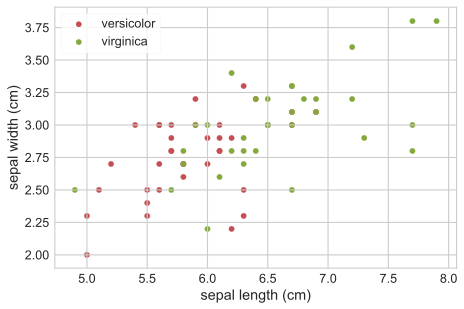

In [12]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='r', label='versicolor')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='g', label='virginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend();

Посмотрим на распределение классов на трейне по признакам  `petal length` и `petal width` 

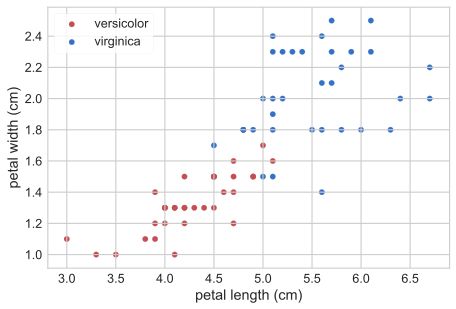

In [13]:
plt.scatter(X_train[y_train == 0][:, 2], X_train[y_train == 0][:, 3], color='r', label='versicolor')
plt.scatter(X_train[y_train == 1][:, 2], X_train[y_train == 1][:, 3], color='b', label='virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend();

- Эксперимент 1

Для нашего эксперимента мы будем работать с признаками `petal length` и `petal width`, поскольку они не сильно пересекаются

In [14]:
#решейпнем наш тест и трайн
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [15]:
# выберем только признаки группы petal
X_train = X_train[:, 2:]
X_test = X_test[:, 2:]

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 2), (30, 2), (70, 1), (30, 1))

- Эксперимент 2 (lvl со звездочкой)

Для нашего эксперимента мы будем работать с признаками `sepal length` и `sepal width` , поскольку они сильно пересекаются между собой

In [17]:
X_train_2, X_test_2 = X[perm][30:], X[perm][:30]
y_train_2, y_test_2 = y[perm][30:], y[perm][:30]

In [18]:
y_train_2 = y_train_2.reshape(-1, 1)
y_test_2 = y_test_2.reshape(-1, 1)

X_train_2 = X_train_2[:, :2]
X_test_2 = X_test_2[:, :2]

## Часть I 
Реализация логистической регрессии и обучение ее градиентным спуском

### Реализация: Эксперимент 1

Алгоритм:
- напишем целевую функцию (логистическая регрессия a.k.a сигмоид)
- напишим функцию потерь
- напишем функцию градиентного спуска
- обучим нашу логистическую регрессию

Напишем логистическую функцию a.k.a сигмоид функция
### $${\displaystyle \sigma (x)={\frac {1}{1+e^{-x}}}}$$

In [19]:
def sigmoid(Z):
    """
    """
    return 1/ (1 + np.e**(-Z))

Напишим функцию потерь, будем использовать (Cross-Entropy Loss)
$$J = -\sum_{i=1}^{N} y_i\log (h_\theta(x_i)) + (1 - y_i)\log(1 - h_\theta(x_i))$$

In [20]:
def logistic_loss(y, y_hat):
    """
    """
    return - np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

Градиентный спуск

### $$ x_{i+1}=x_i-\alpha_i\nabla f(x_i). $$

инициализируем веса:

- w - веса или ${\theta}$  (w - матрица 2x1)
- b - смещение (матрица 1x1)
- learning_rate - определяет величину шага или ${\alpha}$

In [21]:
#зададим начальные условия
w = np.zeros((2, 1)) 
b = np.zeros((1,1))
learning_rate = 0.01

$$ \theta _{i}=\theta _{i}-\alpha \frac{\partial }{\partial \theta _{i}}J(\theta _{1},\theta_{2}) $$

Выполним обучение нашей модели

In [22]:
m = len(y_train)

for epoch in range(5000):
    
    #выполним произведение матрицы обьект-признак на матрицу весов плюс смещение
    Z = np.dot(X_train, w) + b #получаем новую матрицу 70x1
    
    #передаем получившуюся матрицу в sigmoid функцию 
    A = sigmoid(Z) #получаем новую матрицу 70x1
    loss = logistic_loss(y_train, A)#передаем получившуюся матрицу в loss функцию, которая вычисляет потери
    
    #далее возьмем производные
    dz = A - y_train 
    dw = 1/m * np.dot(X_train.T, dz)
    db = np.sum(dz)
    
    #обновляем значения 
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    
    
  
    if epoch % 100 == 0:
        print(loss)


0.6931471805599454
0.6142434409373614
0.5536543533632176
0.5064187120550839
0.4689149464870018
0.4385766739972116
0.41359992331978884
0.39270789560704156
0.3749842388446135
0.35976020046740115
0.34653919184175636
0.33494619447502627
0.32469345784472803
0.3155569091327612
0.3073596757217831
0.299960393621615
0.29324478380511465
0.2871194937222314
0.28150753236257814
0.27634484249579533
0.2715776955260425
0.2671606891095421
0.26305519181901743
0.2592281231567764
0.2556509878245116
0.2522991047055365
0.24915098636630678
0.24618783594456786
0.2433931363460979
0.24075231259732877
0.23825245260196237
0.23588207484803989
0.23363093410529864
0.23148985805289152
0.22945060923698643
0.22750576788687193
0.22564863199785026
0.22387313177904788
0.2221737561086813
0.22054548907153393
0.21898375499850398
0.21748437070513538
0.21604350384963034
0.21465763651216574
0.21332353324510048
0.21203821296461192
0.21079892415374354
0.20960312292895322
0.208448453590298
0.20733273133202856


In [23]:
#посмотрим на итоговые значения наших весов
w, b

(array([[2.6827918 ],
        [2.19067891]]), array([[-16.78414519]]))

In [24]:
#теперь предскажем к какому классу относятся наши сэмплы
pred = []

for i in sigmoid(Z):
    if i > 0.5:
        pred.append(1)
    else:
        pred.append(0)

In [25]:
from sklearn.metrics import precision_score, f1_score, recall_score

In [26]:
precision_score(pred, y_train)

0.9411764705882353

In [27]:
recall_score(pred, y_train)

0.9142857142857143

In [28]:
f1_score(pred, y_train)

0.9275362318840579

In [29]:
X_train[:0].shape, X_train.shape

((0, 2), (70, 2))

(0.5, 3)

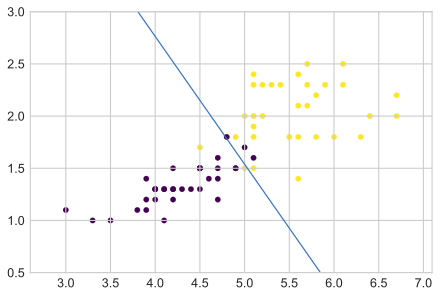

In [60]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train.ravel())
ax = plt.gca()
xvals = np.array(ax.get_xlim()).reshape(-1, 1)
yvals = - (xvals * w[0][0] + b)/w[1][0]
plt.plot(xvals, yvals)
plt.ylim(0.5,3)

### Реализация: Эксперимент 2

In [31]:
w1 = np.zeros((2, 1)) 
b1 = np.zeros((1,1))
learning_rate1 = 0.01

In [32]:
m1 = len(y_train_2)

for epoch1 in range(5000):
    Z1 = np.dot(X_train_2, w1) + b1
    A1 = sigmoid(Z1)
    loss1 = logistic_loss(y_train_2, A1)
    dz1 = A1 - y_train_2
    dw1 = 1/m1 * np.dot(X_train_2.T, dz1)
    db1 = np.sum(dz1)
    
    w1 = w1 - learning_rate1 * dw1
    b1 = b1 - learning_rate1 * db1
    
  
    if epoch1 % 100 == 0:
        print(loss1)

0.6931471805599454
0.6738644745298591
0.6571905820459255
0.6427302644211845
0.6301588262630667
0.6191966914916512
0.6096058187153278
0.6011849679924025
0.5937646925332314
0.5872025570417556
0.581378829607386
0.5761927359792705
0.5715592757605887
0.5674065551924423
0.5636735729226148
0.5603083916605813
0.5572666326089861
0.5545102367808712
0.5520064454272925
0.5497269596256786
0.5476472460857469
0.5457459622444973
0.5440044787541878
0.5424064816098102
0.540937639537688
0.5395853249989315
0.5383383793648799
0.5371869145953081
0.5361221451772417
0.5351362452310108
0.5342222266160727
0.5333738346167529
0.5325854583930261
0.5318520538721973
0.531169077156513
0.530532426847318
0.5299383939527161
0.5293836182642403
0.5288650502678824
0.5283799178033043
0.5279256968079616
0.5275000855849544
0.5271009821184335
0.5267264640314131
0.5263747708403264
0.5260442882106369
0.5257335339599337
0.5254411455904785
0.525165869163307
0.5249065493515509


In [33]:
w1, b1

(array([[1.8543241 ],
        [0.33101577]]), array([[-12.47564258]]))

In [34]:
pred1 = []

for d in sigmoid(Z1):
    if d > 0.5:
        pred1.append(1)
    else:
        pred1.append(0)

In [35]:
from sklearn.metrics import precision_score, f1_score

In [36]:
precision_score(pred1, y_train_2)

0.7352941176470589

In [37]:
recall_score(pred1, y_train_2)

0.8064516129032258

In [38]:
f1_score(pred1, y_train_2)

0.7692307692307693

In [39]:
X_train_2[:0].shape, X_train_2.shape

((0, 2), (70, 2))

(2, 4)

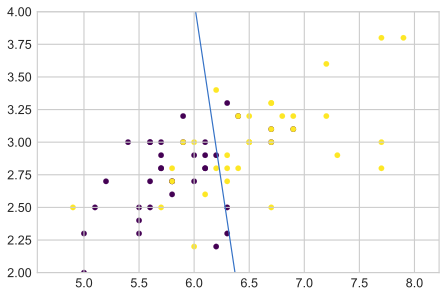

In [61]:
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c = y_train_2.ravel())
ax = plt.gca()
xvals = np.array(ax.get_xlim()).reshape(-1, 1)
yvals = - (xvals * w1[0][0] + b1)/w1[1][0]
plt.plot(xvals, yvals)
plt.ylim(2,4)

## Часть II

Обучим реализованную логистическую регрессию следующими методами:
    - метод nesterov momentum
    - rmsprop



#### Nesterov momentum

Поскольку я не доконца понял как реализовать метод Нестерова, я сначала попробую реализовать его для синтетической ситуации а потом для датасета iris

$$ v_t = \gamma v_{t-1} + \eta \nabla_\theta J( \theta)$$
$$ \theta = \theta - v_t $$


- Синтетический пример

(-0.3, 2)

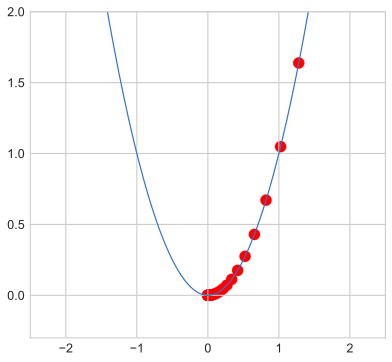

In [64]:
f = lambda x: x ** 2
f_prime = lambda x: 2*x

v_old = 0


x_old = 0
x_new = 2 


lr = 0.1 
precision = 0.0001
betta = 0.9


x_list, y_list = [x_new], [f(x_new)]
 
while abs(x_new - x_old) > precision:
    
    x_old = x_new
    v_new = betta * v_old + lr * f_prime(x_old)
    x_new = x_old - v_new
    
    x_list.append(x_new)
    y_list.append(f(x_new))
    

plt.figure(figsize=(14,6))
x = np.linspace(-2.5,2.5,1000)
plt.subplot(121)   
plt.plot(x,f(x))
plt.scatter(x_list, y_list, c='red', s=128)
plt.xlim([-2.5,2.5])
plt.ylim([-0.3,2])

#### - пример на датасет iris 

$$ v_t = \gamma v_{t-1} + \eta \nabla_\theta J( \theta)$$
$$ \theta = \theta - v_t $$

In [42]:
w2 = np.zeros((2, 1)) 
b2 = np.zeros((1,1))
learning_rate1 = 0.01
betta = 0.9
v1 = 0
v2 = 0

In [43]:
m = len(y_train_2)

for epoch2 in range(5000):
    
    Z2 = np.dot(X_train_2, w2) + b2
    
    A2 = sigmoid(Z2)
    
    loss2 = logistic_loss(y_train_2, A2)
    
    dz2 = A2 - y_train_2
    dw2 = 1/m * np.dot(X_train_2.T, dz2)
    db2 = np.sum(dz2)
    
    v1 = betta * v1 + learning_rate1 * dw2
    v2 = betta * v2 + learning_rate1 * db2
  
    
    w2 = w2 - v1
    b2 = b2 - v2
    
  
    if epoch2 % 100 == 0:
        print(loss2)

0.6931471805599454
0.583355811696558
0.5472661403317399
0.5337037710370303
0.5275294607893262
0.5243877946507909
0.5226679273074302
0.5216746736734597
0.5210760269858775
0.5207017942159587
0.5204600549345216
0.5202991108963011
0.5201889072163173
0.5201114658416571
0.5200557508089226
0.5200148192969959
0.5199841973679122
0.5199609323847741
0.5199430288943971
0.5199291064829675
0.5199181885078692
0.5199095692797466
0.5199027290040716
0.5198972782439414
0.5198929209165198
0.5198894291168047
0.5198866256218954
0.519884371476708
0.5198825570084472
0.5198810952022838
0.5198799167367572
0.5198789662094035
0.5198781992321712
0.5198775801735287
0.5198770803887776
0.5198766768238119
0.5198763509077272
0.5198760876708813
0.5198758750402414
0.5198757032749615
0.5198755645134086
0.5198754524090755
0.5198753618376075
0.5198752886608317
0.5198752295365754
0.5198751817652975
0.5198751431663631
0.5198751119781918
0.5198750867776607
0.5198750664150288


In [49]:
w2, b2

(array([[2.41463956],
        [0.08670128]]), array([[-15.23533658]]))

In [50]:
pred2 = []

for d2 in sigmoid(Z2):
    if d2 > 0.5:
        pred2.append(1)
    else:
        pred2.append(0)

In [57]:
precision_score(pred2, y_train_2)

0.7352941176470589

In [58]:
recall_score(pred2, y_train_2)

0.78125

In [59]:
f1_score(pred2, y_train_2)

0.7575757575757576

In [52]:
X_train_2[:0].shape, X_train_2.shape

((0, 2), (70, 2))

(1.5, 4)

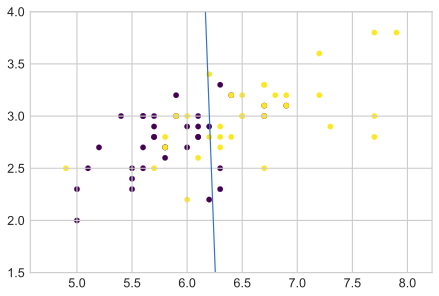

In [53]:
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c = y_train_2.ravel())
ax = plt.gca()
xvals = np.array(ax.get_xlim()).reshape(-1, 1)
yvals = - (xvals * w2[0][0] + b2)/w2[1][0]
plt.plot(xvals, yvals)
plt.ylim(1.5,4)

#### Root Mean Square prop  (rmsprop)